In [19]:
import pandas as pd

# Load the dataset
df = pd.read_csv('Salary_dataset.csv')

df.drop('Unnamed: 0', axis=1, inplace=True)



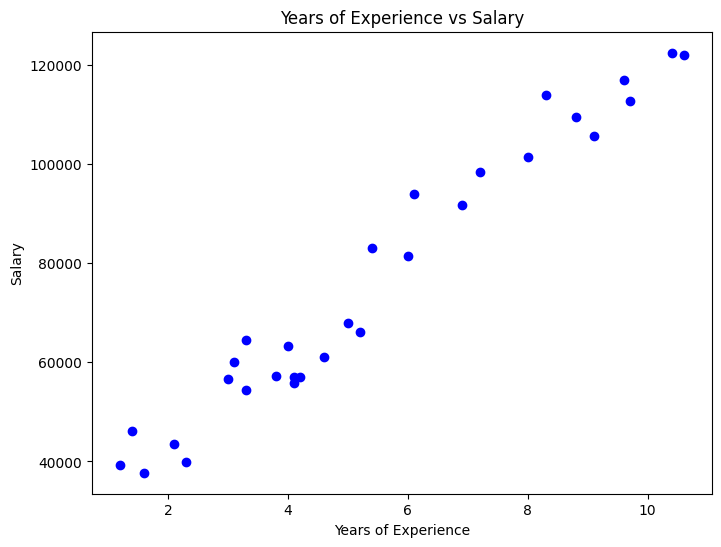

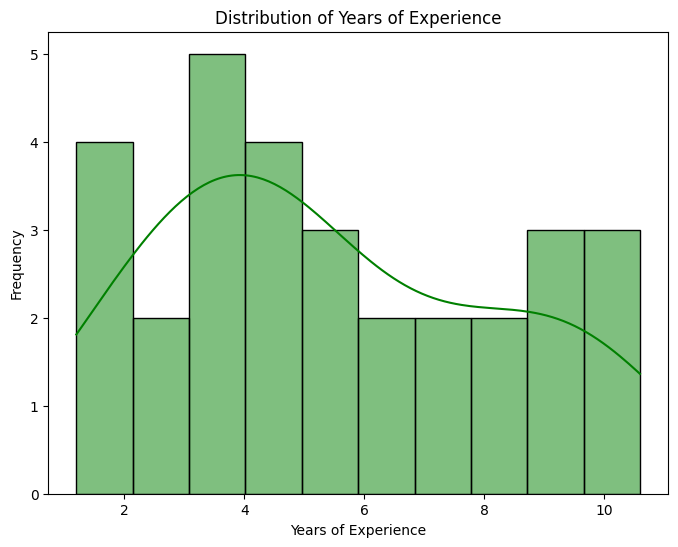

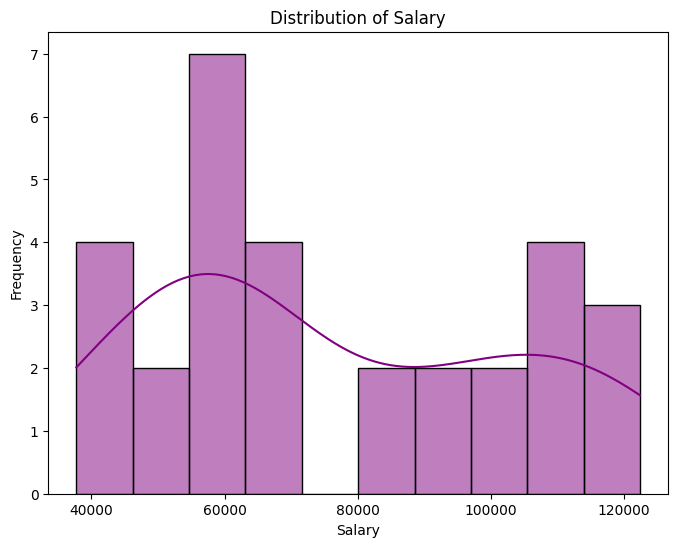

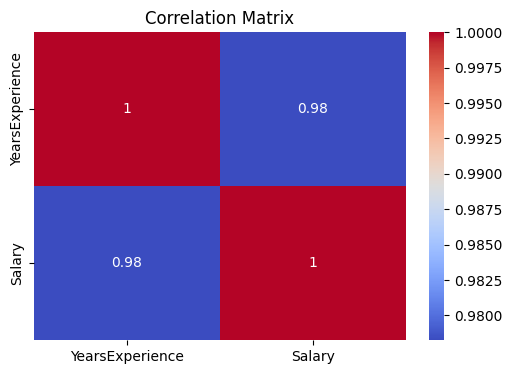

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['YearsExperience'], df['Salary'], color='blue')
plt.title('Years of Experience vs Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()


# Histogram of Years of Experience
plt.figure(figsize=(8, 6))
sns.histplot(df['YearsExperience'], bins=10, kde=True, color='green')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

# Histogram of Salary
plt.figure(figsize=(8, 6))
sns.histplot(df['Salary'], bins=10, kde=True, color='purple')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()


# Correlation Matrix
plt.figure(figsize=(6, 4))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()




In [21]:
df.isnull().sum()


YearsExperience    0
Salary             0
dtype: int64

In [7]:
#train_test_split

from sklearn.model_selection import train_test_split

X = df[['YearsExperience']]
y = df['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [8]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [9]:
y_pred = model.predict(X_test)


In [14]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared = False)
mae = mean_absolute_error(y_test,y_pred)

print(f"R-squared: {r2}")
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")


R-squared: 0.9414466227178215
MAE: 5161.328710400178
MSE: 37784662.46621308
RMSE: 6146.9230079945755


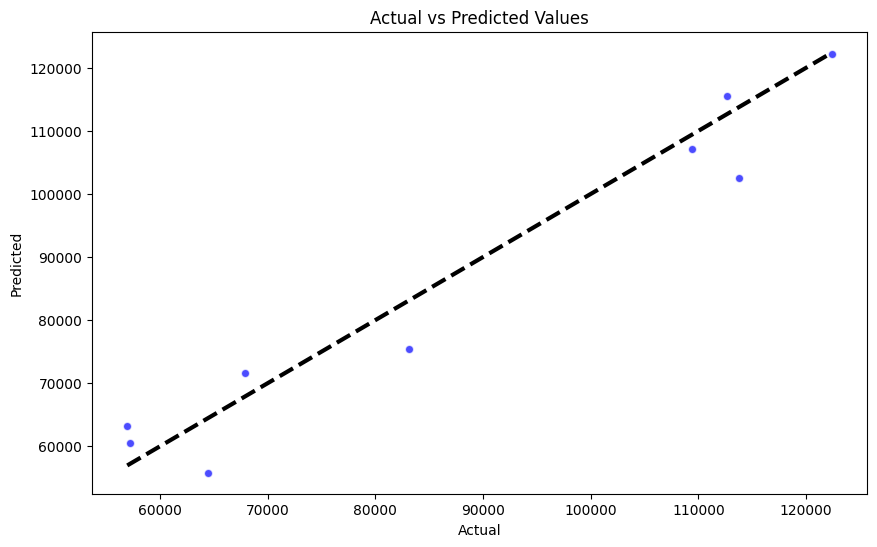

In [15]:
plt.figure(figsize=(10,6))
plt.scatter(y_test, y_pred, color ='blue', edgecolor='w', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

In [24]:
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import pandas as pd

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Save the model and scaler
model_filename = 'salary_prediction_model.pkl'
scaler_filename = 'scaler.pkl'

with open(model_filename, 'wb') as model_file:
    pickle.dump(model, model_file)

with open(scaler_filename, 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)
